In [65]:
using Polynomials

function legendre(k)
    if k == 0
        return Poly([1])
    elseif k == 1
        return Poly([0, 1])
    else
        return (2 * (k - 1) + 1) / k * Poly([0, 1]) * legendre(k - 1) - ((k - 1) / k * legendre(k - 2))
    end
end           

legendre (generic function with 1 method)

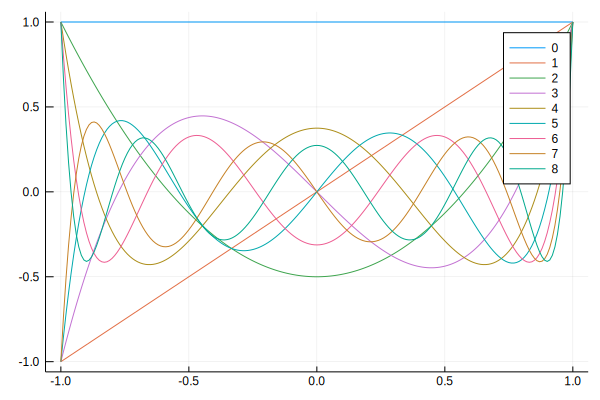

In [66]:
using Plots

xs = -1:0.01:1

p = plot(xs, polyval(legendre(0), xs), label=0)

for k in 1:8
    plot!(xs, polyval(legendre(k), xs), label=k)
end

display(p)

In [67]:
using QuadGK

for k in 2:4
    (xp, a) = gauss(Float64, k)
    println(sort(xp))
    println(sort(roots(legendre(k))))
end

[-0.57735, 0.57735]
[-0.57735, 0.57735]
[-0.774597, 0.0, 0.774597]
[-0.774597, 0.0, 0.774597]
[-0.861136, -0.339981, 0.339981, 0.861136]
[-0.861136, -0.339981, 0.339981, 0.861136]


In [88]:
function integrate(f, k)
    (xp, a) = gauss(Float64, k)
    return sum(a .* f.(xp))
end

f(x) = x^7 - x^4
for k in 1:15
    result = integrate(f, k)
    error = abs(result - (-2 / 5))
    println(k, "\t", result)
    println("\terror: ", error)
    println()
end

1	0.0
	error: 0.4

2	-0.22222222222222232
	error: 0.1777777777777777

3	-0.4
	error: 0.0

4	-0.4000000000000002
	error: 1.6653345369377348e-16

5	-0.4
	error: 0.0

6	-0.4000000000000002
	error: 1.6653345369377348e-16

7	-0.4000000000000002
	error: 1.6653345369377348e-16

8	-0.39999999999999963
	error: 3.885780586188048e-16

9	-0.40000000000000013
	error: 1.1102230246251565e-16

10	-0.4
	error: 0.0

11	-0.40000000000000013
	error: 1.1102230246251565e-16

12	-0.4000000000000002
	error: 1.6653345369377348e-16

13	-0.4
	error: 0.0

14	-0.40000000000000024
	error: 2.220446049250313e-16

15	-0.4000000000000003
	error: 2.7755575615628914e-16



In [89]:
function integrate(f, a, b)
    g(z) = f((b + a) / 2 + (b - a) * z / 2 * (b - a) / 2)
    return integrate(g, 8)
end

f(x) = x^2

println(integrate(f, -1, 1), "\t", 2 / 3)
println(integrate(f, -2, 0), "\t", 8 / 3)
println(integrate(f, 3, 5), "\t", 98 / 3)
println(integrate(f, -12, -10), "\t", 728 / 3)

0.6666666666666666	0.6666666666666666
2.666666666666666	2.6666666666666665
32.666666666666664	32.666666666666664
242.6666666666666	242.66666666666666


In [90]:
println(quadgk(f, -12, -10))

n(x) = 1 / sqrt(2 * pi) * exp((-x^2) / 2)
println(quadgk(n, -Inf, Inf))

(242.66666666666666, 0.0)
(1.0000000000032583, 1.4395584941504537e-8)


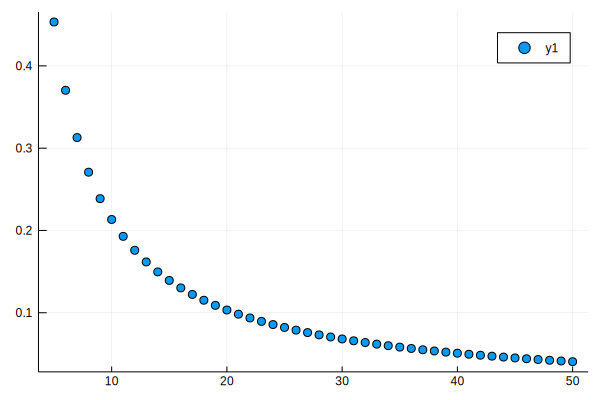

In [91]:
function rectangles(f, n, a, b)
    dx = abs(a - b) / n
    xs = a:dx:b
    sum = 0.0
    
    for x=xs
        sum = sum + f(x) * dx
    end
    
    return sum
end

valid = 2 / 3
errors = []

ns = 5:50

for n in ns
    push!(errors, abs(rectangles(f, n, -1, 1) - valid))
end

scatter(ns, errors)